In [1]:
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
# using interp2d to simulate a known function by adding noisy data
x = y = np.linspace(-2, 2, 10)
def f(x,y):
    return np.exp(-(x + .5)**2  - 2*(y + .5)**2)  -  np.exp(-(x  - .5)**2  - 2*(y  - .5)**2)

In [11]:
# evaluate function at the sample points
X, Y = np.meshgrid(x, y)
# simulate noisy data at gird points
Z = f(X, Y)+ 0.05*np.random.randn(*X.shape)


In [13]:
f_i = interpolate.interp2d(x, y, Z, kind='cubic')

In [15]:
xx = yy = np.linspace(x.min(), x.max(), 100)
ZZi = f_i(xx, yy)
XX, YY = np.meshgrid(xx, yy)

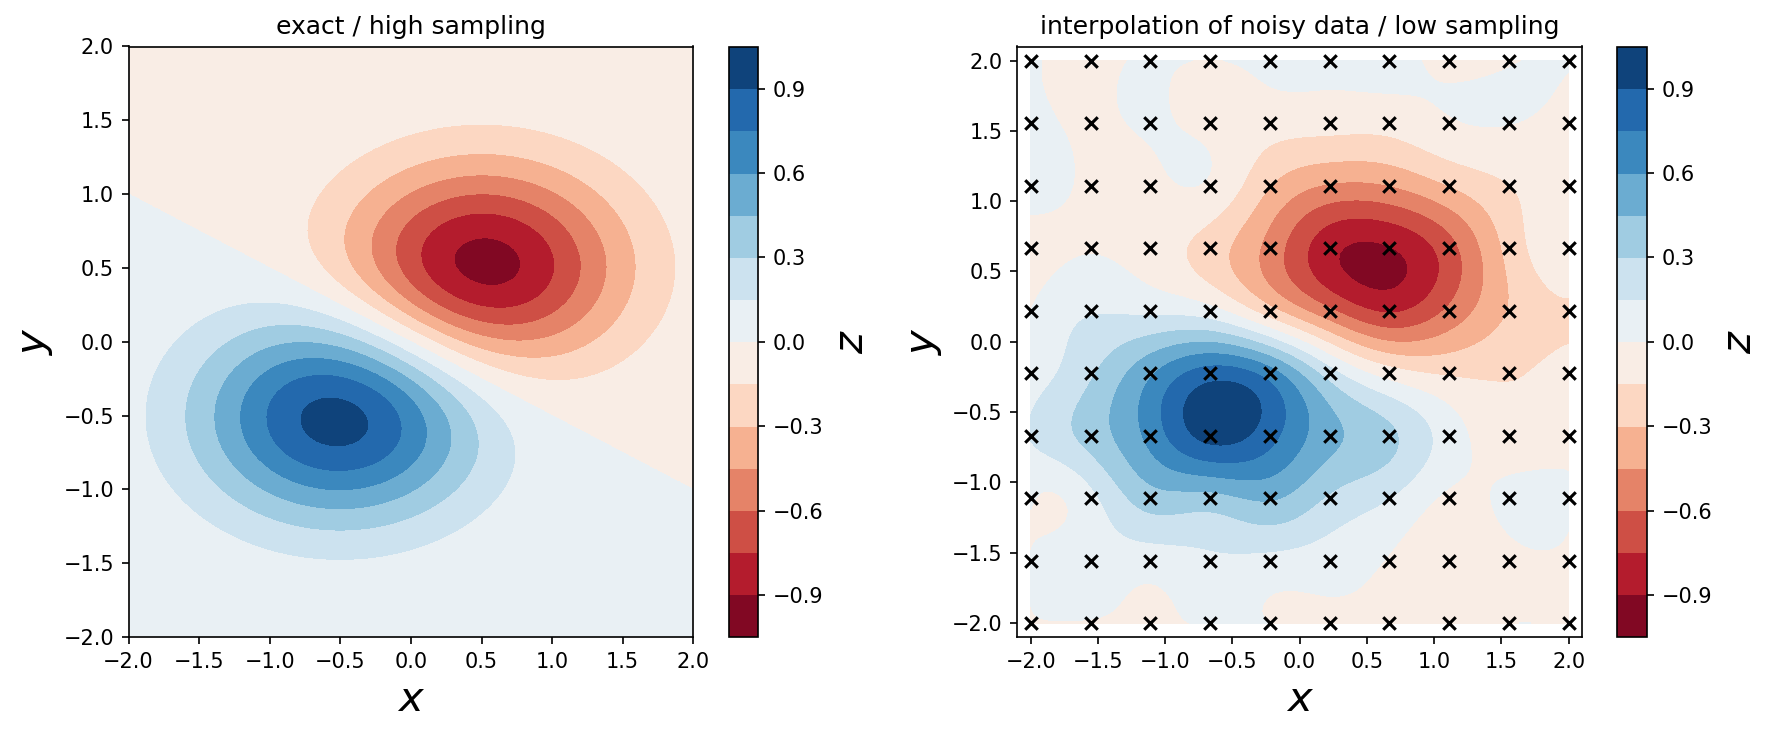

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)
# for reference, first plot the contours of the exact function
c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)
#    next, plot the contours of the supersampled interpolation of the noisy data
c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)
fig.tight_layout()

Using `griddata`
---

Another common situation that requires multivariate interpolation occurs when sampled data is given on an irregular coordinate grid. This situation frequently arises (e.g., in experiments or other data collection processes) when the exact values at which the observations are collected cannot be directly controlled. To be able to easily plot and analyze such data with existing tools, it may be desirable to interpolate it onto a regular coordinate grid.

In [20]:
# unstructured sampling points and a known function

def f(x, y):
    return np.exp(-x**2  - y**2) * np.cos(4*x) * np.sin(6*y)

In [22]:
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

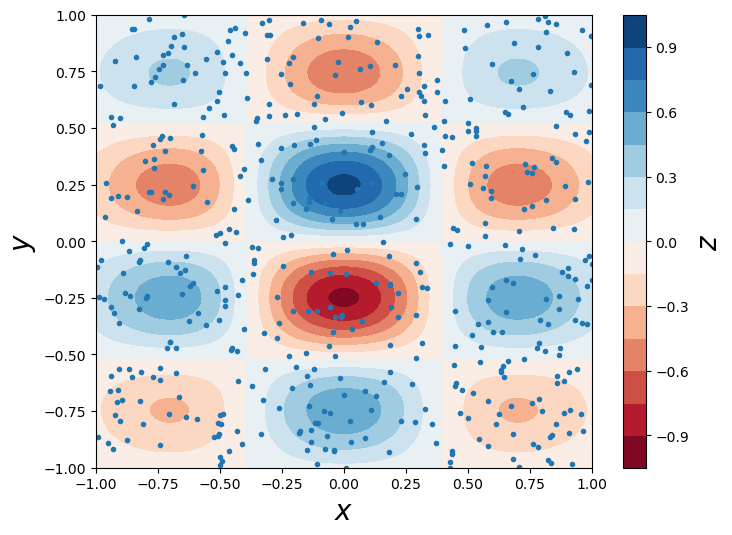

In [24]:
# vizualizing the function and the density of sampling points
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu)
ax.scatter(xdata, ydata, marker='.')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
cb = fig.colorbar(c, ax=ax) 
cb.set_label(r"$z$", fontsize=20)

In [25]:
# comparing different interpolate methods
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

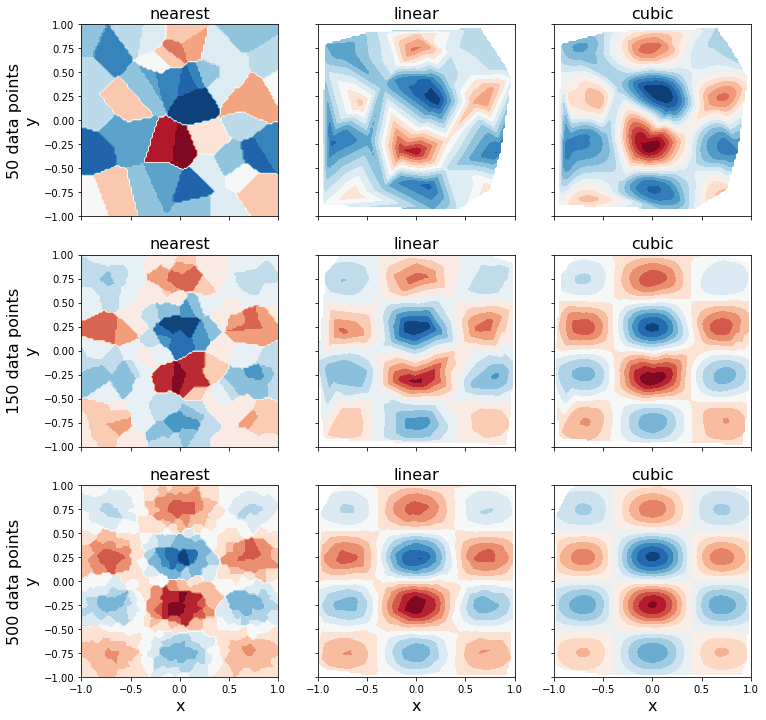

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
n_vec = [50, 150, 500]
for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16) 
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)